In [1]:
import pandas as pd

data = pd.read_csv("../data/preprocessed_dataset.csv",index_col=[0])

In [2]:
data.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,distance_btw_lax,accommodates,bedrooms,...,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d,negiborhood_frequency,review_scores_rating,price
0,4495,0,1.0,1.0,5,33.98209,-118.38494,5.000751,6,2.0,...,True,1,1,730,30,2,0,307,80.0,115.0
1,4481,0,1.0,1.0,6,34.16562,-118.33458,25.832095,6,3.0,...,True,1,1,14,2,8,0,331,97.0,176.0
2,4414,1,2.0,2.0,7,34.09768,-118.34602,18.291401,1,1.0,...,True,2,2,366,30,26,1,1616,97.0,67.0
3,4413,0,2.0,2.0,8,34.00475,-118.48127,9.715794,1,1.0,...,True,2,2,180,1,21,0,1184,94.0,155.0
4,4405,0,1.0,1.0,4,33.87619,-118.11397,28.145402,2,1.0,...,True,1,1,730,30,0,0,29,-1.0,50.0


CART Regression Feature Importance

In [3]:
#decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [4]:
# define dataset
X, y = data.iloc[:,:-1],data.iloc[:,-1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Feature: host_since, Score: 0.02135
Feature: host_is_superhost, Score: 0.00264
Feature: host_listings_count, Score: 0.02207
Feature: host_total_listings_count, Score: 0.08718
Feature: host_verifications, Score: 0.04784
Feature: latitude, Score: 0.03050
Feature: longitude, Score: 0.15174
Feature: distance_btw_lax, Score: 0.05670
Feature: accommodates, Score: 0.01322
Feature: bedrooms, Score: 0.03475
Feature: beds, Score: 0.05857
Feature: bathrooms, Score: 0.31336
Feature: amenity_num, Score: 0.04183
Feature: host_response_time, Score: 0.01993
Feature: host_response_rate, Score: 0.00355
Feature: host_acceptance_rate, Score: 0.02228
Feature: neighborhood_matched, Score: 0.00032
Feature: property_type, Score: 0.00408
Feature: room_type, Score: 0.00660
Feature: maximum_nights, Score: 0.01262
Feature: minimum_nights, Score: 0.01677
Feature: number_of_reviews, Score: 0.00560
Feature: number_of_reviews_l30d, Score: 0.00050
Feature: negiborhood_frequency, Score: 0.02104
Feature: review_scores_r

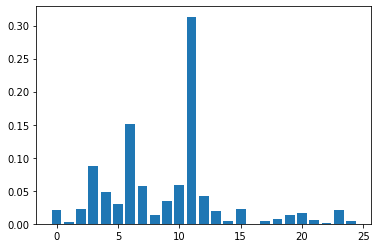

In [5]:
# get importance
importance_CART = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_CART):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_CART))], importance_CART)
pyplot.show()

In [6]:
importance_CART

array([0.02135051, 0.00264482, 0.02207097, 0.08717569, 0.04784274,
       0.03050418, 0.15173613, 0.05669597, 0.01321828, 0.03474757,
       0.0585722 , 0.31335933, 0.04183201, 0.01993066, 0.00354706,
       0.02228263, 0.00032472, 0.00407572, 0.00660402, 0.01261544,
       0.01676946, 0.00559789, 0.00050133, 0.02104381, 0.00495688])

In [7]:
feature_importance_CART = {}
for i in range(len(importance_CART)):
    feature_importance_CART[X.columns[i]] = abs(importance_CART[i])

In [8]:
feature_importance_CART = pd.DataFrame.from_dict(feature_importance_CART, orient='index')

feature_importance_CART = feature_importance_CART.sort_values(0, ascending=False)

feature_importance_CART.reset_index(inplace=True)

In [9]:
feature_importance_CART

,index,0
0,bathrooms,0.313359
1,longitude,0.151736
2,host_total_listings_count,0.087176
3,beds,0.058572
4,distance_btw_lax,0.056696
5,host_verifications,0.047843
6,amenity_num,0.041832
7,bedrooms,0.034748
8,latitude,0.030504
9,host_acceptance_rate,0.022283


In [10]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("RMSE : ",metrics.mean_squared_error(y_pred,y_test)**0.5)

RMSE :  465.7900218577679


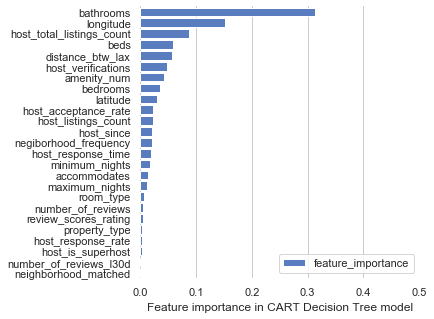

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x=0, y="index", data=feature_importance_CART,
            label="feature_importance", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.5), ylabel="",
       xlabel="Feature importance in CART Decision Tree model")
sns.despine(left=True, bottom=True)

Random Forest Regression Feature Importance

Feature: host_since, Score: 0.03219
Feature: host_is_superhost, Score: 0.00128
Feature: host_listings_count, Score: 0.04109
Feature: host_total_listings_count, Score: 0.04058
Feature: host_verifications, Score: 0.02361
Feature: latitude, Score: 0.03443
Feature: longitude, Score: 0.12525
Feature: distance_btw_lax, Score: 0.04460
Feature: accommodates, Score: 0.02298
Feature: bedrooms, Score: 0.05787
Feature: beds, Score: 0.02241
Feature: bathrooms, Score: 0.30293
Feature: amenity_num, Score: 0.03782
Feature: host_response_time, Score: 0.03817
Feature: host_response_rate, Score: 0.02774
Feature: host_acceptance_rate, Score: 0.02211
Feature: neighborhood_matched, Score: 0.00312
Feature: property_type, Score: 0.00617
Feature: room_type, Score: 0.01461
Feature: maximum_nights, Score: 0.01557
Feature: minimum_nights, Score: 0.02755
Feature: number_of_reviews, Score: 0.01369
Feature: number_of_reviews_l30d, Score: 0.00118
Feature: negiborhood_frequency, Score: 0.02802
Feature: review_scores_r

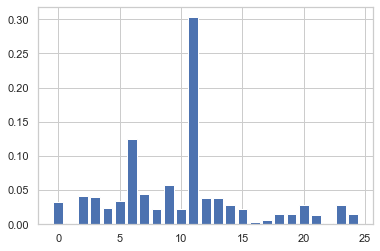

In [13]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = data.iloc[:,:-1],data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance_RF = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_RF):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_RF))], importance_RF)
pyplot.show()

In [14]:
importance_RF

array([0.03219224, 0.00128306, 0.04109094, 0.04058278, 0.02361086,
       0.03442547, 0.12525017, 0.04460157, 0.02297511, 0.05786753,
       0.02241065, 0.30292596, 0.03781852, 0.03816717, 0.02773717,
       0.02210811, 0.00312452, 0.00616659, 0.01460591, 0.01556536,
       0.02754682, 0.01369369, 0.00117635, 0.02802077, 0.01505267])

In [15]:
feature_importance_RF = {}
for i in range(len(importance_RF)):
    feature_importance_RF[X.columns[i]] = abs(importance_RF[i])

In [16]:
feature_importance_RF = pd.DataFrame.from_dict(feature_importance_RF, orient='index')

feature_importance_RF = feature_importance_RF.sort_values(0, ascending=False)

feature_importance_RF.reset_index(inplace=True)

In [17]:
feature_importance_RF

,index,0
0,bathrooms,0.302926
1,longitude,0.125250
2,bedrooms,0.057868
3,distance_btw_lax,0.044602
4,host_listings_count,0.041091
5,host_total_listings_count,0.040583
6,host_response_time,0.038167
7,amenity_num,0.037819
8,latitude,0.034425
9,host_since,0.032192


In [18]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("RMSE : ",metrics.mean_squared_error(y_pred,y_test)**0.5)

RMSE :  375.982442234168


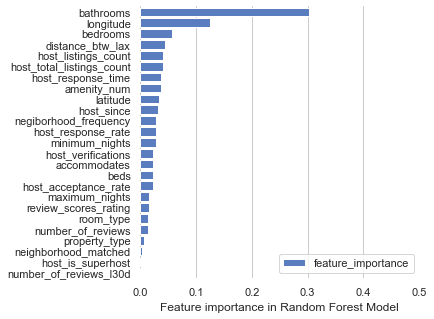

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x=0, y="index", data=feature_importance_RF,
            label="feature_importance", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.5), ylabel="",
       xlabel="Feature importance in Random Forest Model")
sns.despine(left=True, bottom=True)